In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
import math

In [2]:
# write Position Angles table with single space character separator

In [3]:
%%file css_ds9_pa.txt
t z op uv r
1 0.017 150 0 41
2 0.536 109 0 70
3 0.361 70 63 82
4 0.091 36 24 39
5 0.404 54 64 44
6 0.445 23 45 44
7 0.371 132 73 71
8 0.171 156 86 93
9 0.195 157 0 22

Overwriting css_ds9_pa.txt


In [3]:
df = pd.read_csv('css_ds9_pa.txt', sep=' ', header=0)
df.columns=['source','redshift','optical','uv', 'radio']
df

,source,redshift,optical,uv,radio
0,1,0.017,150,0,41
1,2,0.536,109,0,70
2,3,0.361,70,63,82
3,4,0.091,36,24,39
4,5,0.404,54,64,44
5,6,0.445,23,45,44
6,7,0.371,132,73,71
7,8,0.171,156,86,93
8,9,0.195,157,0,22


In [16]:
def set_plot(fig):
    
    for ax in fig.get_axes():

        ax.yaxis.labelpad = 10
        ax.yaxis.set_ticks_position('both')    # ticks on all sides of plot
        ax.xaxis.set_ticks_position('both')
        
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        
        ax.tick_params(axis='both',direction='in',which='both',length=8, pad=8.0, labelsize=10) #width=1.0
        ax.tick_params(which='minor',length=4)


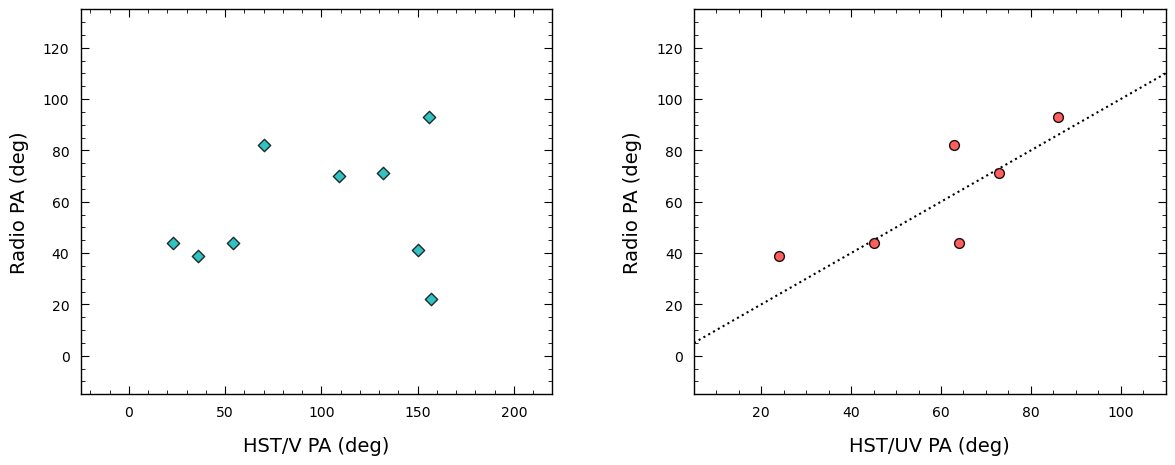

In [39]:
fig1, axes = plt.subplots(1, 2, figsize=(14,5)) 
plt.subplots_adjust(wspace=0.3)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.linewidth'] = 1.0

set_plot(fig1)

axes[0].scatter(df['optical'], df['radio'], s=40, marker='D', facecolors='#00b3b3', edgecolors='k', alpha=0.8)
axes[0].set_xlim([-25,220])
axes[0].set_ylim([-15,135])
axes[0].set_xlabel('HST/V PA (deg)', fontsize=14, labelpad=12)
axes[0].set_ylabel('Radio PA (deg)', fontsize=14)

#axes[1].plot(df['uv'], df['uv'],linestyle=':', color='k', zorder=1)
axes[1].axline((0, 0), slope=1, linestyle=':', color='k', zorder=1)
axes[1].scatter(df['uv'], df['radio'], s=50, marker='o', facecolors='#ff4d4d', edgecolors='k', alpha=0.9)
axes[1].set_xlim([5,110])
axes[1].set_ylim([-15,135])
axes[1].set_xlabel('HST/UV PA (deg)', fontsize=14, labelpad=12)
axes[1].set_ylabel('Radio PA (deg)', fontsize=14)

#plt.savefig('PA_plot1.pdf',facecolor='w', dpi=1000, bbox_inches='tight', pad_inches=0.2)

In [24]:
def uvL(dict_input):

    c = 3.0e18
    hst_L = []
    data = pd.read_csv('~/phd_research/CSS2/SFR_calc/gal_corr_sfr_mags.csv', header=[0])
    hst_mAB = data['hst_uv'].values
    hst_Fnu = [ 10**(- (k + 48.6) / 2.5) for k in hst_mAB ]
    
    target_name = list(dict_input.keys())
    
    for i in range (len(target_name)):
    
        if target_name[i] == '1037+30':
            eff_lambda = 2341.0
        elif target_name[i] == '1221-1221':
            eff_lambda = 2715.3
        else:
            eff_lambda = 3361.1 
        
        # L in ergs/sec
        hst_L.append((4 * math.pi * d[i]**2) * hst_Fnu[i] * (c/eff_lambda)) 
                 
    return hst_L


In [25]:
dic = {'1025+390':1940.5, '1037+30':417.2, '1128+455':2217.0, '1201+394':2488.2, 
              '1203+645':2004.1, '1221-423':826.8}  # (in Mpc)

#(1 Mpc =  3.08e24 cm)

d = np.zeros(6, dtype=np.float32)
i = 0
for source in dic:
    d[i] = dic[source] * 3.08e24
    i = i+1

    
uv_lum = uvL(dic)
uv_lum

[1.2553891712903737e+43,
 1.1084592472900565e+43,
 1.301614924893452e+43,
 3.554034769110349e+42,
 1.2439127786113606e+43,
 4.3828043715156916e+43]

In [26]:
lum_list=[]
for m in range(len(uv_lum)):
    #lum_list.append(np.nan)   #NaN element for 3 non-uv sources
    lum_list.append(uv_lum[m]/1e43)

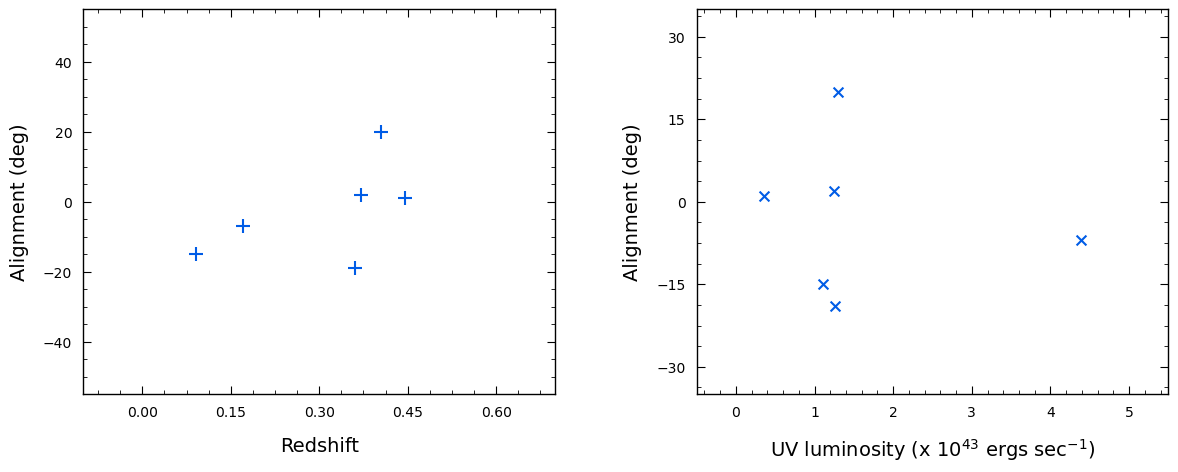

In [28]:
fig2, axes2 = plt.subplots(1, 2, figsize=(14,5)) 
plt.subplots_adjust(wspace=0.3)
plt.rcParams['axes.linewidth'] = 1.0

set_plot(fig2)

y = (df['uv'] - df['radio']).to_numpy()
z = df['redshift'].to_numpy()

align_list = [y[x] for x in range(2,8)]
redshift = [z[x] for x in range(2,8)]

axes2[0].scatter(redshift, align_list, s=100, marker='+', facecolors='#005ce6')
axes2[0].set_xlim([-0.1,0.7])
axes2[0].set_ylim([-55,55])
axes2[0].set_xlabel('Redshift', fontsize=14, labelpad=12)
axes2[0].set_ylabel('Alignment (deg)', fontsize=14)
axes2[0].xaxis.set_major_locator(plt.MaxNLocator(7))
axes2[0].yaxis.set_major_locator(plt.MaxNLocator(6))

axes2[1].scatter(lum_list, align_list, s=50, marker='x', facecolors='#005ce6')
axes2[1].set_xlim([-0.5,5.5])
axes2[1].set_ylim([-35,35])
axes2[1].set_xlabel('UV luminosity (x 10$^{43}$ ergs sec$^{-1}$)', fontsize=14, labelpad=12)
axes2[1].set_ylabel('Alignment (deg)', fontsize=14)
axes2[1].xaxis.set_major_locator(plt.MaxNLocator(7))
axes2[1].yaxis.set_major_locator(plt.MaxNLocator(6))


#plt.savefig('PA_plot2.pdf',facecolor='w', dpi=1000, bbox_inches='tight', pad_inches=0.5)

In [29]:
align_list

[-19, -15, 20, 1, 2, -7]

In [30]:
# 1.4 GHz radio luminosity
# x 10^27 W/Hz

# 1025: 0.296, 1037: 0.008, 1128: 1.201, 1201: 0.356, 1203: 1.781, 1221: 0.205

radio_lum = [0.296, 0.008, 1.201, 0.356, 1.781, 0.205]
#radio_lum = [radio_lum[x]*10 for x in range(len(radio_lum))]

In [31]:
radio_lum

[0.296, 0.008, 1.201, 0.356, 1.781, 0.205]

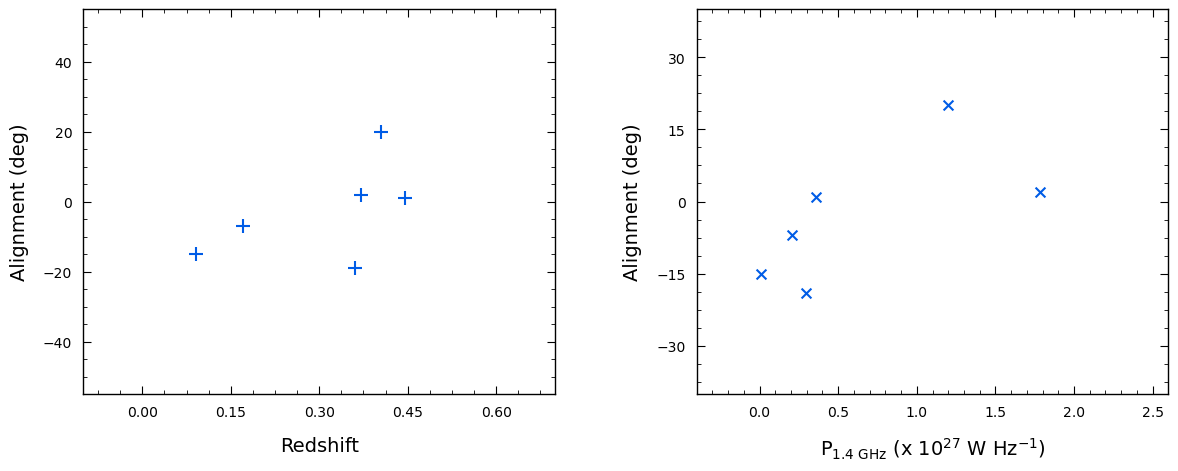

In [40]:
fig3, axes3 = plt.subplots(1, 2, figsize=(14,5)) 
plt.subplots_adjust(wspace=0.3)
plt.rcParams['axes.linewidth'] = 1.0

set_plot(fig3)

y = (df['uv'] - df['radio']).to_numpy()
z = df['redshift'].to_numpy()

align_list = [y[x] for x in range(2,8)]
redshift = [z[x] for x in range(2,8)]

axes3[0].scatter(redshift, align_list, s=100, marker='+', facecolors='#005ce6')
axes3[0].set_xlim([-0.1,0.7])
axes3[0].set_ylim([-55,55])
axes3[0].set_xlabel('Redshift', fontsize=14, labelpad=12)
axes3[0].set_ylabel('Alignment (deg)', fontsize=14)
axes3[0].xaxis.set_major_locator(plt.MaxNLocator(7))
axes3[0].yaxis.set_major_locator(plt.MaxNLocator(6))

axes3[1].scatter(radio_lum, align_list, s=50, marker='x', facecolors='#005ce6')
#axes3[1].set_xlim([-1.5,21.5])
axes3[1].set_xlim([-0.4,2.6])
axes3[1].set_ylim([-40,40])
axes3[1].set_xlabel('P$_{1.4\mathrm{\ GHz}}$ (x 10$^{27}$ W Hz$^{-1}$)', fontsize=14, labelpad=12)
axes3[1].set_ylabel('Alignment (deg)', fontsize=14)
axes3[1].xaxis.set_major_locator(plt.MaxNLocator(7))
axes3[1].yaxis.set_major_locator(plt.MaxNLocator(6))

#plt.savefig('PA_plot3.pdf',facecolor='w', dpi=1000, bbox_inches='tight', pad_inches=0.5)

In [ ]:
df.replace(0, "\nodata", inplace=True)

In [83]:
from tabulate import tabulate
print(tabulate(df.replace(0, '\nodata'), tablefmt="latex", headers="keys", showindex=False, numalign="center", stralign="center"))

\begin{tabular}{ccccc}
\hline
  source  &  redshift  &  optical  &  uv   &  radio  \\
\hline
    1     &   0.017    &    150    & odata &   41    \\
    2     &   0.536    &    109    & odata &   70    \\
    3     &   0.361    &    70     &  63   &   82    \\
    4     &   0.091    &    36     &  24   &   39    \\
    5     &   0.404    &    54     &  64   &   44    \\
    6     &   0.445    &    23     &  45   &   44    \\
    7     &   0.371    &    132    &  73   &   71    \\
    8     &   0.171    &    156    &  86   &   93    \\
    9     &   0.195    &    157    & odata &   22    \\
\hline
\end{tabular}
